In [13]:
import cv2
import numpy as np

import PIL
import matplotlib.pyplot as plt

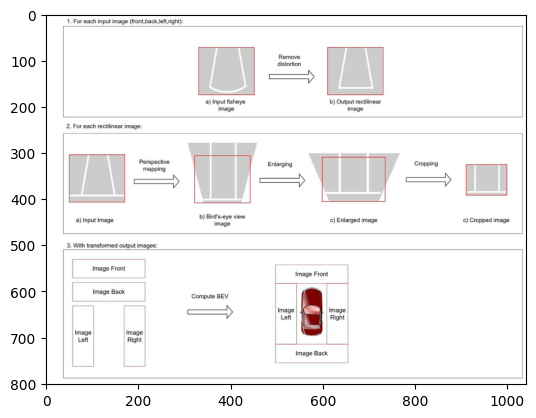

(<matplotlib.image.AxesImage at 0x1350c8c5b70>, None)

In [14]:
exec_path_img = cv2.imread('../data/fisheye/bev_path.png')
plt.imshow(exec_path_img), plt.show()

In [15]:
# K: !!opencv-matrix
#    rows: 3
#    cols: 3
#    dt: d
#    data: [ 659.9565405462982, -2.8848508379788056, 634.6329612029243, 0.0, 625.1032520893773, 544.7433055928482, 0., 0., 1. ]
# D: !!opencv-matrix
#    rows: 1
#    cols: 4
#    dt: d
#    data: [ -0.2900269437421997, 0.11089496468175668, -0.0003222479159157141, 0.0029110573007121382]
# xi: !!opencv-matrix
#    rows: 1
#    cols: 1
#    dt: d
#    data: [ 1.0866311153248236 ]
# board_width: 9
# board_height: 6
# square_size: 2.4229999631643295e-02

In [16]:
image1 = cv2.imread('../data/fisheye/left_851.png')
image2 = cv2.imread('../data/fisheye/front_851.png')
image3 = cv2.imread('../data/fisheye/right_851.png')
image4 = cv2.imread('../data/fisheye/rear_851.png')

gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
gray3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
gray4 = cv2.cvtColor(image4, cv2.COLOR_BGR2GRAY)

In [17]:
# Camera matrix (intrinsic parameters)
K_data = [-659.9565405462982, 2.8848508379788056, 634.6329612029243, 0.0, 625.1032520893773, 544.7433055928482, 0., 0., 1.]
K = np.array(K_data).reshape(3, 3)

# Distortion coefficients
D_data = [-0.2900269437421997, 0.11089496468175668, -0.0003222479159157141, 0.0029110573007121382]
D = np.array(D_data).reshape(1, 4)

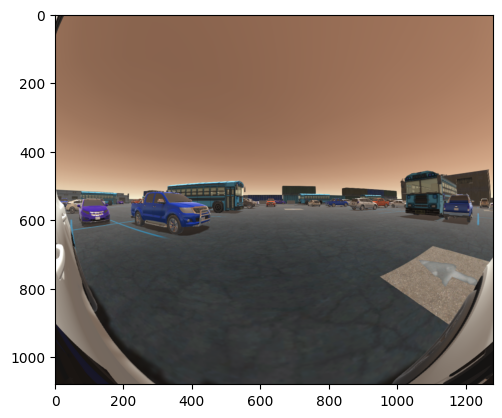

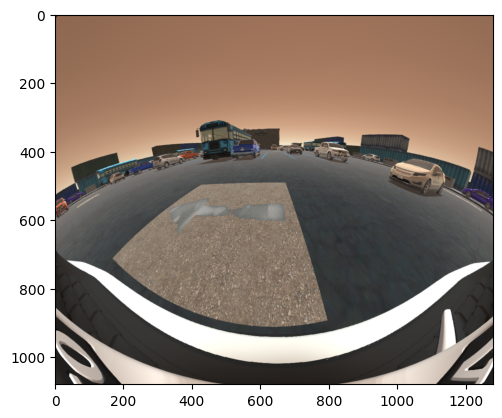

(<matplotlib.image.AxesImage at 0x1350c7d8220>, None)

In [18]:
rectilinear_img =  cv2.undistort(image1, K, D)  # LEFT
rectilinear_img2 = cv2.undistort(image2, K, D) # FRONT
rectilinear_img3 = cv2.undistort(image3, K, D) # RIGHT
rectilinear_img4 = cv2.undistort(image4, K, D) # REAR

plt.imshow(rectilinear_img), plt.show()
plt.imshow(rectilinear_img2), plt.show()

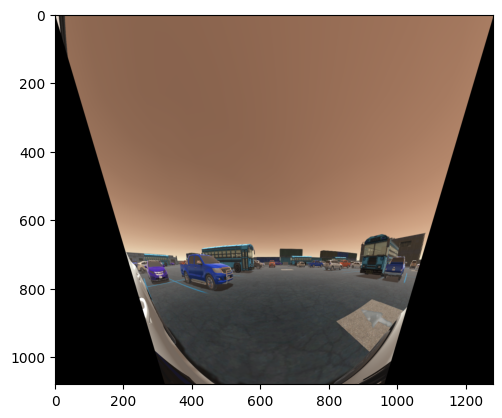

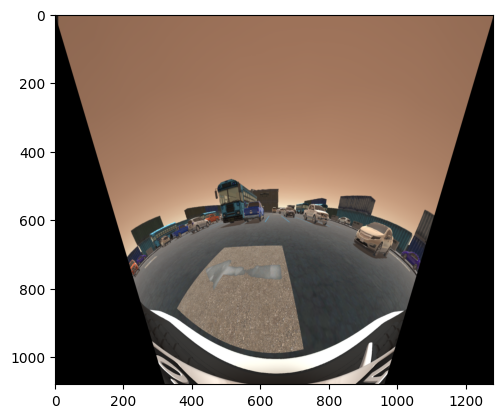

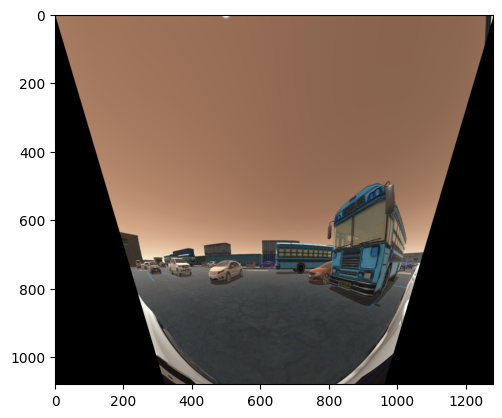

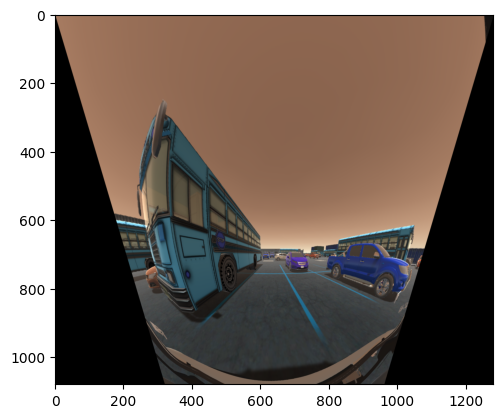

(<matplotlib.image.AxesImage at 0x1350f15e740>, None)

In [21]:
height, width = image2.shape[:2]


src_pts1 = np.array([[0, 0], [0, height], [width, height], [width, 0]], dtype=np.float32)
dst_pts = np.array([[0, 0], [width * .25, height], [width * .75, height], [width, 0]], dtype=np.float32)

M1 = cv2.getPerspectiveTransform(src_pts1, dst_pts)

warped_image1 = cv2.warpPerspective(rectilinear_img, M1, (width, height))
warped_image2 = cv2.warpPerspective(rectilinear_img2, M1, (width, height))
warped_image3 = cv2.warpPerspective(rectilinear_img3, M1, (width, height))
warped_image4 = cv2.warpPerspective(rectilinear_img4, M1, (width, height))


plt.imshow(warped_image1), plt.show() # LEFT 
plt.imshow(warped_image2), plt.show() # FRONT
plt.imshow(warped_image3), plt.show() # RIGHT
plt.imshow(warped_image4), plt.show() # REAR


In [22]:
# Enlarge & Crop
